<a href="https://colab.research.google.com/github/arkincognito/Baekjoon_Online_Judge/blob/master/n412/n412a_Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 2*

---

# 📝 Assignment

# 경사하강법과 역전파 알고리즘

## 문제 1. 개념이해

- 1-1. 신경망의 역전파를 이해하기 위해서는 Loss 함수를 해당 가중치로 `편미분` 한 값을 구해야 한다. 
- 1-2. 신경망의 역전파에서 Loss함수는 `True` 값과 출력층에서 나오는 값(출력값, output)의 차이로 정의(구성)된다. 
- 1-3. 신경망의 가중치를 업데이트할 양을 계산하기 위해서 **문제1-1**의 과정을 연산해야 하는데, 복합적인 함수로 구성된 경우 한번에 계산하기 어렵거나 불가능하기 때문에 `Chain Rule` 을 도입(사용)한다. 이는 합성함수 연산 공식을 이용해서 계산가능한 것들을 각각 연산하여, 전체의 값을 종합적으로 도출하는 방법이다.  
- 1-4. 신경망의 가중치를 업데이트(학습)할 양(수치)가 정해지지만 항상 100%를 반영하는 것이 아니라 0.01, 0.001 등 학습하는 양을 조절하는 하이퍼파라미터를 설정하여 얼마만큼 씩 반영할 것인지를 정해줄 수 있다. 이렇게 한번에 얼만큼씩 파라미터를 업데이트 할 지 정해주는 것을 `Learning Rate` 이라 한다. 

## 문제 2. Keras 이용하기

32개의 입력 노드, 64, 256개의 노드 2개의 은닉층, 5개의 클래스로 구성된 데이터를 가진 신경망을 만드는 데 필요한 알맞은 숫자를 넣으시오.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

A = 64
B = 32 
C = 256
D = 5

model = Sequential([
    Dense(A, activation='sigmoid', input_dim=B), # A, B
    Dense(C, activation='sigmoid'), # C
    Dense(D, activation='softmax') # D
])

lossFunction = 'categorical_crossentropy'
batch_size = 50

model.compile(optimizer='sgd', loss=lossFunction, metrics=['acc'])
model.summary()
# results = model.fit(X,y, batch_size=batch_size, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 20,037
Trainable params: 20,037
Non-trainable params: 0
_________________________________________________________________


- 2-1. 각각의 알파벳에 들어갈 숫자들은 이용하여  `A+C/B + D` 을 연산하여 정답을 입력하시오. (덧셈과 나눗셈의 순서를 혼동하지 않도록 조심할 것.)

`77`

- 2-2. lossFunction에는 어떤 값을 넣어주어야 하나?
`'categorical_crossentropy'`
- 2-3. 입력데이터의 개수는 100개이고 batch_size가 50개라고 하면, 위 코드를 기준으로 전체 가중치의 학습(iteration)은 총 몇번이 일어날까?
`200번`

# 도전과제

## 1) PPT(Keynote) 등을 이용하여 역전파 알고리즘을 강의할 수 있는 자료를 만들어 보세요. 
- 발표자료는 2장을 추천하며, 최대 4장 내에서 해결해주세요. 
- 유튜브나, 강의 자료에서 사용한 구조를 그대로 사용해도 좋습니다. 한편 해당 내용을 다음 과제에서 code로 구현할 것입니다.

## 2) 다음 개념에 대해 조사하여 정리해 보세요

1. 다음 각 손실함수에 대해 어떤 상황에 사용해야 하는지 정리하세요.
    - BinaryCrossentropy
    - CategoricalCrossentropy
    - SparseCategoricalCrossentropy
    - MeanSquaredError
   
[loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

2. 다음 각 optimizer에 대해 조사하고 개념을 간략히 정리(2-3문장 이내)하세요
    - tf.keras.optimizers.SGD
    - tf.keras.optimizers.RMSprop
    - tf.keras.optimizers.Adam
    - tfa.keras.optimizers.AdamW

[optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). 

In [ ]:
# Install requirements if using Google Colab
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install xgboost
    !pip install tensorflow-gpu==2.0.0-rc1
    !pip install tensorflow-addons[tensorflow-gpu]
    

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 4.3MB 31.5MB/s 
     |████████████████████████████████| 501kB 27.4MB/s 


     |████████████████████████████████| 686kB 5.0MB/s 
     |████████████████████████████████| 454.3MB 26kB/s 
  Found existing installation: tensorflow-gpu 2.0.0rc1
    Uninstalling tensorflow-gpu-2.0.0rc1:
      Successfully uninstalled tensorflow-gpu-2.0.0rc1


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats
mpl.rcParams['axes.unicode_minus'] = False
set_matplotlib_formats('retina')

import numpy as np
import pandas as pd

# Adjust maximum display row count, column count, and column width
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_colwidth", 9999)

# Adjust default float display to .3f
pd.set_option("precision", 4)
import seaborn as sns
%matplotlib inline

# Avoid scroll-in-the-scroll in the entire Notebook on Google Colab
# https://stackoverflow.com/questions/55546869/google-colaboratory-is-there-any-way-to-expand-the-height-of-the-result-cell-of
from IPython.display import Javascript
def resize_colab_cell():
    display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
COLOR_FACECOLOR = "#454545"
COLOR_FONT = "white"
COLOR_PROPS = "white"
def set_rcDefault():
    for key in ["axes.facecolor", "figure.facecolor", "legend.facecolor", "savefig.facecolor"]:
        plt.rcParams[key] = COLOR_FACECOLOR

    plt.rcParams['text.color'] = COLOR_FONT
    plt.rcParams['axes.titlecolor'] = COLOR_FONT
    plt.rcParams['axes.labelcolor'] = COLOR_FONT
    plt.rcParams['xtick.color'] = COLOR_FONT
    plt.rcParams['ytick.color'] = COLOR_FONT
    # This doesn't work for regplot
    # plt.rcParams['scatter.edgecolors'] = COLOR_PROPS

    # ATM, these two props color settings won't work with sns.boxplot.
    for key in plt.rcParams.keys():
        if "props.markerfacecolor" in key or "props.markeredgecolor" in key:
            plt.rcParams[key] = COLOR_PROPS

    # Properties for quantile markers and outlier(flier) markers in boxplot
    for key in ['boxplot.capprops.color',  'boxplot.meanprops.color', 'boxplot.medianprops.color', 'boxplot.whiskerprops.color', 'boxplot.flierprops.color']:
        plt.rcParams[key] = COLOR_PROPS

    # Set title sizes for axes and figure
    for key in plt.rcParams.keys():
        if "titlesize" in key:
            plt.rcParams[key] = "xx-large"

    plt.rcParams['legend.fontsize'] = "large"
    plt.rcParams['legend.title_fontsize'] = "large"
    plt.rcParams["axes.labelsize"] = "large"

    plt.rcParams['axes.titlepad'] = 6.0
    for key in plt.rcParams.keys():
        if "weight" in key:
            plt.rcParams[key] = 'bold'

    ## This section is used for kwargs in seaborn plots.
    # use for boxplot props
PROPS_BOXPLOT = {
    "flierprops" : dict(markerfacecolor=COLOR_PROPS),
    "whiskerprops" : dict(color=COLOR_PROPS),
    "capprops" : dict(color=COLOR_PROPS),
    "meanprops" : dict(color=COLOR_PROPS),
    "medianprops" : dict(color=COLOR_PROPS)
}
# use for regplot line_kws and scatter_kws
line_kws={"color":COLOR_PROPS}
scatter_kws={"alpha":0.5, "edgecolor":COLOR_PROPS, "linewidth":0.1}
set_rcDefault()

# sns.set_style('whitegrid') globally change sns style.style must be one of white, dark, whitegrid, darkgrid, ticks
# HOWEVER, sns.set_theme() takes in default args such as font and style, and change them to default setting.
# So sns.set_theme(), should be used before font setting.
# Otherwise, use with sns.axes_style()
# sns.set(rc={'figure.facecolor':'k'})

<IPython.core.display.Javascript object>

## 3) 지난 과제였던 Mouse data 분류문제를 해결하는데 신경망을 5-fold CrssValidation(CV)을 이용하여 총 5개의 모델을 만들어서 성능을 측정하고 비교해 보세요. 


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
import tensorflow_addons as tfa

np.random.seed(13)
tf.random.set_seed(13)

df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)
df_label -= 1

df = df.to_numpy()
df_label = np.array(df_label).reshape(-1)

histories = []
models = []
results = []

kfold = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfold.split(df, df_label):
    X_train = df[train_index] 
    X_test = df[test_index]
    y_train = df_label[train_index]
    y_test = df_label[test_index]

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1)
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(100, input_shape = (69,), activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(100, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

    # model.compile(optimizer=tfa.optimizers.AdamW(weight_decay=0.5),
    #           loss = 'binary_crossentropy',
    #           metrics=['accuracy'],
    #           )
    model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'],
              )
    
    history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=0)

    histories.append(history)
    results.append(model.evaluate(X_test, y_test))
    models.append(model)

<IPython.core.display.Javascript object>

Restoring model weights from the end of the best epoch.
Epoch 00062: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9398
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8241
Restoring model weights from the end of the best epoch.
Epoch 00062: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8744
Restoring model weights from the end of the best epoch.
Epoch 00061: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9023
Restoring model weights from the end of the best epoch.
Epoch 00058: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9349


In [ ]:
best_model_num = 0
best_accuracy = 0

for index, result in enumerate(results):
    print('----------------'*3)
    print(f'Model #{index}')
    print('test loss: ', result[0])
    print('test accuracy: ', result[1])
    if best_accuracy < result[1]:
        best_accuracy = result[1]
        best_model_num = index

print('----------------'*3)
print('================'*3)

print(f'Best model: Model #{best_model_num}')
print('test loss: ', results[best_model_num][0])
print('test accuracy: ', results[best_model_num][1])

<IPython.core.display.Javascript object>

------------------------------------------------
Model #0
test loss:  0.19174949824810028
test accuracy:  0.9398148059844971
------------------------------------------------
Model #1
test loss:  0.4370422959327698
test accuracy:  0.8240740895271301
------------------------------------------------
Model #2
test loss:  0.2944982051849365
test accuracy:  0.8744186162948608
------------------------------------------------
Model #3
test loss:  0.2261354625225067
test accuracy:  0.9023255705833435
------------------------------------------------
Model #4
test loss:  0.2556547522544861
test accuracy:  0.934883713722229
------------------------------------------------
Best model: Model #0
test loss:  0.19174949824810028
test accuracy:  0.9398148059844971


<IPython.core.display.Javascript object>

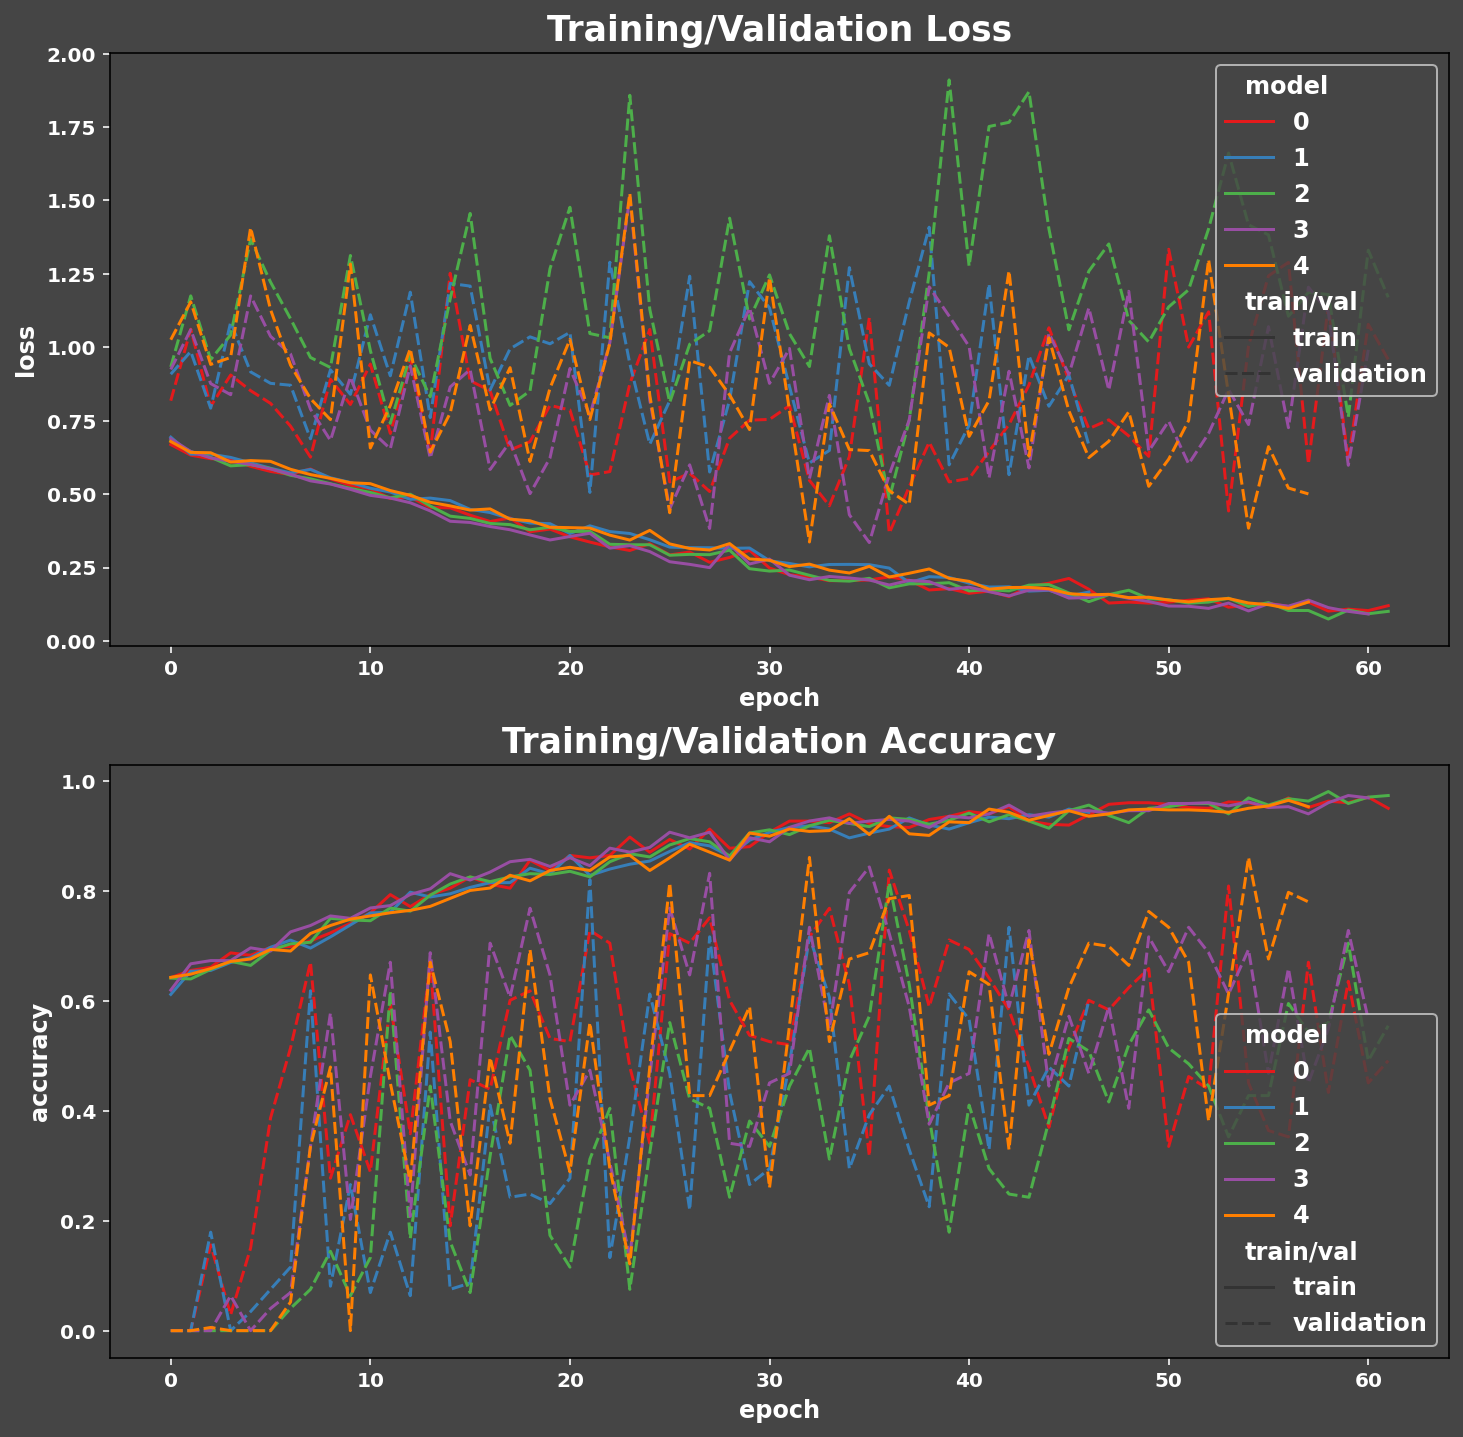

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(12,12))
categories = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
df_acc_concat = pd.DataFrame()
df_loss_concat = pd.DataFrame()
for index, history in enumerate(histories):
    df_train_loss = pd.DataFrame({'metric': 'loss', 'value':history.history['loss'], 'train/val': 'train', 'model': index})
    df_train_acc = pd.DataFrame({'metric': 'accuracy', 'value':history.history['accuracy'], 'train/val': 'train', 'model': index})
    df_val_loss = pd.DataFrame({'metric': 'loss', 'value':history.history['val_loss'], 'train/val': 'validation', 'model': index})
    df_val_acc = pd.DataFrame({'metric': 'accuracy', 'value':history.history['val_accuracy'], 'train/val': 'validation', 'model': index})
    
    df_loss = pd.concat([df_train_loss, df_val_loss]).reset_index().rename(columns={'index':'epoch'})
    df_loss_concat = pd.concat([df_loss_concat, df_loss])

    df_acc = pd.concat([df_train_acc, df_val_acc]).reset_index().rename(columns={'index':'epoch'})
    df_acc_concat = pd.concat([df_acc_concat, df_acc])

sns.lineplot(data=df_loss_concat, x='epoch', y='value', ax=axes[0], style='train/val', hue='model', ci=None, palette='Set1')
sns.lineplot(data=df_acc_concat, x='epoch', y='value', ax=axes[1], style='train/val', hue='model', ci=None, palette='Set1')

axes[0].set_ylabel('loss')
axes[0].set_title("Training/Validation Loss")
axes[1].set_ylabel('accuracy')
axes[1].set_title("Training/Validation Accuracy")

plt.show()
    # sns.lineplot(x=[i for i in range(len(train_loss))], y=val_loss, ax=axes[0], linestyle='--', color=axes[0].lines[index*2].get_color())
    # sns.lineplot(x=[i for i in range(len(train_loss))], y=train_acc, ax=axes[1])
    # sns.lineplot(x=[i for i in range(len(train_loss))], y=val_acc, ax=axes[1], linestyle='--', color=axes[1].lines[index*2].get_color())
# axes[0].title('')

## 4) 🔥 추가 목표

- MNIST, Fashion MNIST를, cross entropy & soft-max를 사용해서 풀어보시고, Activation Function, optimizer를 수정하여 기존 성능을 개선시켜 보세요. 실무에 나가시면, 데이터만 바뀌지 같은 작업을 지속적으로 하실 것이고, 퍼포먼스(성능)을 높이기 위해 어떤 작업을 해보셨는지 말씀하실 수 있습니다.
- 위 문제를 풀면서 5-fold CV을 수행해보세요.
- 강의 시청
    - [Lecture 9.2 — Neural Networks Learning | Backpropagation Algorithm — [ Machine Learning | Andrew Ng]](https://youtu.be/x_Eamf8MHwU)
    - [Lecture 9.3 — Neural Networks Learning | Backpropagation Intuition — [ Machine Learning | Andrew Ng]](https://youtu.be/mOmkv5SI9hU)
    - [Lecture 9.7 — Neural Networks Learning | Putting It Together — [ Machine Learning | Andrew Ng]](https://youtu.be/cObOAIImeVQ)
- 다른 경사하강법 기반의 최적화 도구를 공부해보세요. 
 - [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)

In [ ]:
# 라이브러리 데이터셋을 불러옵니다. 
mnist = tf.keras.datasets.mnist

# Training Set, Test Set을 분류해줍니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Value normalization을 수행합니다. 
x_train, x_test = x_train / 255.0, x_test / 255.0